# L3-A - Linear Quantization II: Symmetric vs. Asymmetric Mode

In this lesson, you will learn a different way of performing linear quantization, Symmetric Mode.

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode.

In [1]:
import torch

def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()
    q_max = torch.iinfo(dtype).max

    # return the scale
    return r_max/q_max

In [2]:
### test the implementation on a 4x4 matrix
test_tensor = torch.randn((4, 4))

test_tensor

tensor([[-1.1483, -1.0025,  2.5998, -0.4268],
        [-0.3339,  1.0515, -1.1330,  0.3286],
        [ 1.0065,  0.4554,  0.6481,  0.9464],
        [-0.9315, -0.7489,  0.2506, -0.1832]])

**Note:** Since the values are random, what you see in the video might be different than what you will get.

In [3]:
get_q_scale_symmetric(test_tensor)

0.020470660502516377

- Perform Linear Quantization in Symmetric Mode.
- `linear_q_with_scale_and_zero_point` is the same function you implemented in the previous lesson.

In [8]:
from helper import linear_q_with_scale_and_zero_point

def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor)
    
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor,
                                                     scale=scale,
                   # in symmetric quantization zero point is = 0    
                                                    zero_point=0,
                                                      dtype=dtype)
    
    return quantized_tensor, scale

quantized_tensor, scale = linear_q_symmetric(test_tensor)

print(quantized_tensor)
print(scale)

tensor([[-56, -49, 127, -21],
        [-16,  51, -55,  16],
        [ 49,  22,  32,  46],
        [-46, -37,  12,  -9]], dtype=torch.int8)
0.020470660502516377


### Dequantization

- Perform Dequantization
- Plot the Quantization error.
- `linear_dequantization` is the same function you implemented in the previous lesson.

In [10]:
from helper import linear_dequantization, plot_quantization_errors
from helper import quantization_error

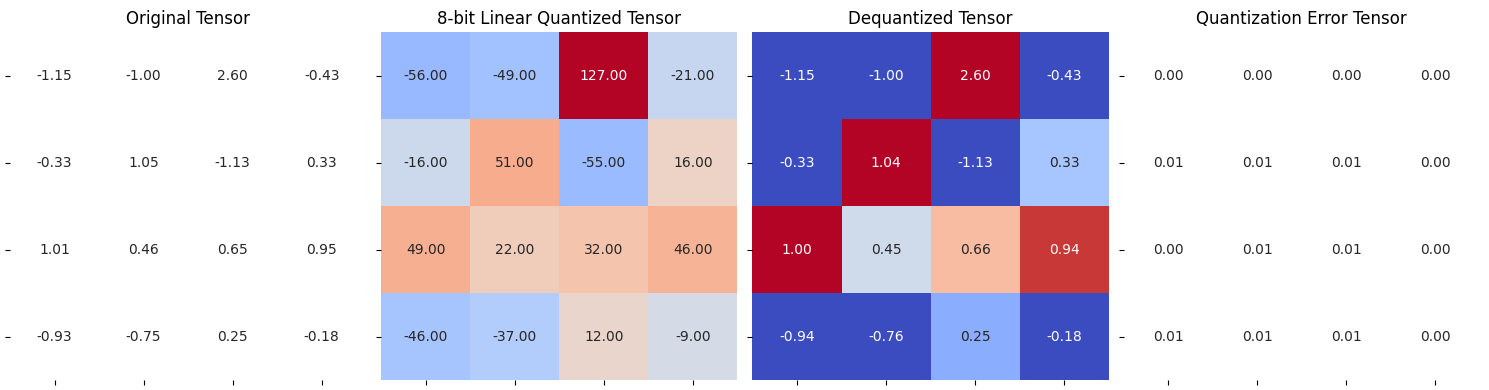

Quantization Error : 2.954084993689321e-05


In [11]:
dequantized_tensor = linear_dequantization(quantized_tensor,scale,0)

plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")